# Let's Talk about noise 

For the purpose of detection power calculations we think of noise as sampling noise.  In reality, it's often more complex than that.  Our best estimate of noise is the unexplained variance of our data.  Let's look at the Whakauru Stream data as an example.

First we'll read in the data and plot it.

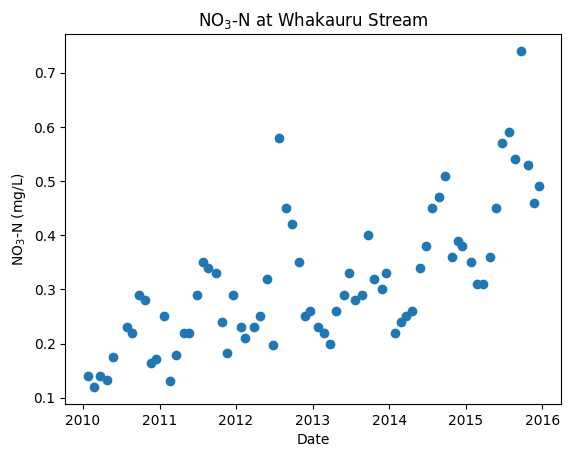

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from komanawa.kendall_stats import MannKendall

raw_n_vals = np.array([0.079, 0.085, 0.052, 0.045, 0.095, 0.143, 0.125, 0.141, 0.098,
                       0.091, 0.065, 0.072, 0.064, 0.072, 0.065, 0.1, 0.103, 0.164,
                       0.123, 0.113, 0.099, 0.079, 0.068, 0.053, 0.087, 0.07, 0.065,
                       0.05, 0.101, 0.127, 0.14, 0.094, 0.086, 0.051, 0.079, 0.072,
                       0.094, 0.082, 0.084, 0.105, 0.13, 0.153, 0.174, 0.128, 0.061,
                       0.075, 0.066, 0.067, 0.023, 0.066, 0.064, 0.12, 0.13, 0.11,
                       0.12, 0.18, 0.19, 0.17, 0.12, 0.051, 0.12, 0.14, 0.11,
                       0.12, 0.15, 0.21, 0.21, 0.28, 0.24, 0.25, 0.2, 0.15,
                       0.14, 0.12, 0.14, 0.132, 0.176, 0.23, 0.22, 0.29, 0.28,
                       0.164, 0.171, 0.25, 0.131, 0.178, 0.22, 0.22, 0.29, 0.35,
                       0.34, 0.33, 0.24, 0.183, 0.29, 0.23, 0.21, 0.23, 0.25,
                       0.32, 0.197, 0.58, 0.45, 0.42, 0.35, 0.25, 0.26, 0.23,
                       0.22, 0.2, 0.26, 0.29, 0.33, 0.28, 0.29, 0.4, 0.32,
                       0.3, 0.33, 0.22, 0.24, 0.25, 0.26, 0.34, 0.38, 0.45,
                       0.47, 0.51, 0.36, 0.39, 0.38, 0.35, 0.31, 0.31, 0.36,
                       0.45, 0.57, 0.59, 0.54, 0.74, 0.53, 0.46, 0.49, 0.45,
                       0.44, 0.47, 0.49, 0.54, 0.98, 0.96, 0.93, 0.85, 0.86,
                       0.91, 0.83, 0.67, 0.72, 0.7, 1.03, 1.19, 1.07, 1.36,
                       1.36, 1.36, 1.21, 1.09, 0.94, 1.02, 1.01, 0.99, 1.05,
                       1.14, 1.32, 1.45, 1.6, 1.32, 1.26, 1.23, 1.22, 1.17,
                       1.16, 1.13, 1.13, 1.2, 1.18, 1.29, 1.3, 1.1, 1.38,
                       1.2, 1.27, 1.16, 1.29, 1.34, 1.42, 1.23, 1.47, 1.29,
                       1.27, 1.41, 1.37, 1.42, 1.19, 1.4, 1.36, 1.37, 1.5,
                       0.67, 1.57, 1.58, 1.6])

raw_n_dates = np.array(
    ['2004-01-27', '2004-02-23', '2004-03-22', '2004-04-26', '2004-05-24', '2004-06-22', '2004-07-27', '2004-08-23',
     '2004-09-28', '2004-10-25', '2004-11-22', '2004-12-20', '2005-01-24', '2005-02-20', '2005-03-22', '2005-04-26',
     '2005-05-24', '2005-06-27', '2005-07-25', '2005-08-23', '2005-09-28', '2005-10-24', '2005-11-21', '2005-12-18',
     '2006-01-23', '2006-02-20', '2006-03-29', '2006-04-26', '2006-05-22', '2006-06-27', '2006-07-23', '2006-08-22',
     '2006-09-25', '2006-10-24', '2006-11-27', '2006-12-19', '2007-01-23', '2007-02-27', '2007-03-27', '2007-04-23',
     '2007-05-29', '2007-06-25', '2007-07-24', '2007-08-27', '2007-09-23', '2007-10-23', '2007-11-25', '2007-12-16',
     '2008-01-29', '2008-02-26', '2008-03-25', '2008-04-21', '2008-05-28', '2008-06-24', '2008-07-21', '2008-08-25',
     '2008-09-22', '2008-10-27', '2008-11-25', '2008-12-16', '2009-01-27', '2009-02-23', '2009-03-24', '2009-04-27',
     '2009-05-27', '2009-06-22', '2009-07-27', '2009-08-24', '2009-09-28', '2009-10-26', '2009-11-23', '2009-12-21',
     '2010-01-24', '2010-02-21', '2010-03-22', '2010-04-27', '2010-05-24', '2010-07-28', '2010-08-24', '2010-09-27',
     '2010-10-25', '2010-11-21', '2010-12-14', '2011-01-24', '2011-02-21', '2011-03-21', '2011-04-26', '2011-05-24',
     '2011-06-28', '2011-07-26', '2011-08-22', '2011-09-26', '2011-10-24', '2011-11-21', '2011-12-19', '2012-01-25',
     '2012-02-15', '2012-03-26', '2012-04-25', '2012-05-28', '2012-06-26', '2012-07-23', '2012-08-28', '2012-09-24',
     '2012-10-28', '2012-11-25', '2012-12-18', '2013-01-28', '2013-02-25', '2013-03-25', '2013-04-22', '2013-05-28',
     '2013-06-24', '2013-07-23', '2013-08-26', '2013-09-23', '2013-10-21', '2013-11-25', '2013-12-15', '2014-01-27',
     '2014-02-24', '2014-03-24', '2014-04-21', '2014-05-27', '2014-06-24', '2014-07-22', '2014-08-25', '2014-09-22',
     '2014-10-27', '2014-11-24', '2014-12-15', '2015-01-26', '2015-02-25', '2015-03-23', '2015-04-28', '2015-05-26',
     '2015-06-23', '2015-07-28', '2015-08-25', '2015-09-20', '2015-10-26', '2015-11-23', '2015-12-15', '2016-01-25',
     '2016-02-22', '2016-03-21', '2016-04-25', '2016-05-23', '2016-06-27', '2016-07-25', '2016-08-23', '2016-09-26',
     '2016-10-24', '2016-11-21', '2016-12-14', '2017-01-23', '2017-02-21', '2017-03-27', '2017-04-25', '2017-05-22',
     '2017-06-26', '2017-07-24', '2017-08-21', '2017-09-25', '2017-10-23', '2017-11-27', '2017-12-18', '2018-01-29',
     '2018-02-26', '2018-03-26', '2018-04-22', '2018-05-22', '2018-06-26', '2018-07-23', '2018-08-27', '2018-09-24',
     '2018-10-22', '2018-11-26', '2018-12-17', '2019-01-28', '2019-02-25', '2019-03-25', '2019-04-22', '2019-05-27',
     '2019-06-24', '2019-07-22', '2019-08-26', '2019-09-23', '2019-10-21', '2019-11-25', '2019-12-17', '2020-01-27',
     '2020-02-24', '2020-06-22', '2020-07-28', '2020-08-24', '2020-09-21', '2020-10-26', '2020-11-24', '2020-12-15',
     '2021-01-26', '2021-02-23', '2021-03-29', '2021-04-27', '2021-05-18', '2021-06-21', '2021-07-26', '2021-09-22',
     '2021-10-25', '2021-11-22', '2021-12-19']

)

ndata = pd.DataFrame({'n': raw_n_vals, 'date': pd.to_datetime(raw_n_dates)})

ndata = ndata.set_index('date')
ndata = ndata.sort_index()
ndata = ndata.loc[~((ndata.index > '2020-01-01') & (ndata['n'] < 0.8))]
ndata = ndata.loc['2010-01-01':'2016-01-01']

fig, ax = plt.subplots()
ax.scatter(ndata.index, ndata['n'])
ax.set_ylabel('NO$_{3}$-N (mg/L)')
ax.set_xlabel('Date')
ax.set_title('NO$_{3}$-N at Whakauru Stream')
plt.show()

## Mean model
The simplest estimate of variance is simply the variance of the data.  Let's calculate that.  Here we'll present the standard deviation of the data ($\sqrt{Variance}$). Our explanation of the data is the data mean. So our model is $f(t) = \bar{n}$, that is that all measurements should be equal to the mean concentration

The standard deviation of the data is 0.126 mg/L


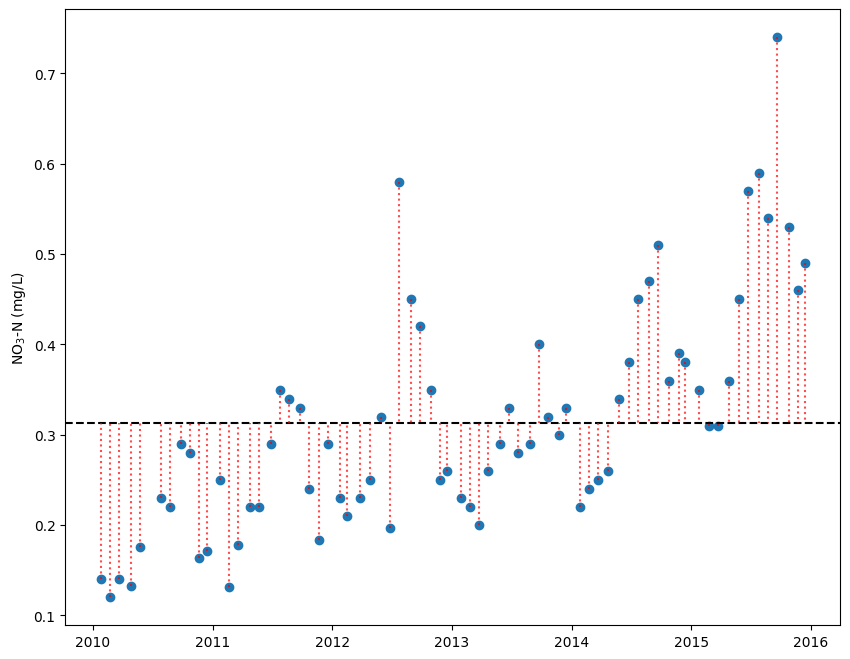

In [32]:
mm_error = ndata['n'].std()
print(f"The standard deviation of the data is {mm_error:.3f} mg/L")
fig, ax = plt.subplots(figsize=(10, 8))
nmean = ndata['n'].mean()
ax.scatter(ndata.index, ndata['n'], label=f'raw data')
ax.axhline(nmean, color='k', ls='--', label=f'mean = {ndata["n"].mean():.3f} mg/L')
ax.set_ylabel('NO$_{3}$-N (mg/L)')
for i, row in ndata.iterrows():
    ax.plot([i, i], [row['n'], nmean], color='red', ls=':', alpha=0.7)
plt.show()

Obviously this isn't a great model of the data

## Senslope/Sen-intercept Model

Let's improve our model by accounting for the trend in the data.  We'll use the Mann-Kendall test to calculate the slope and intercept of the trend line.  We'll then use this to calculate the residuals of the data from the trend line.  The standard deviation of the residuals becomes our estimate of the noise in the data. 

The standard deviation of the residuals is:  0.09


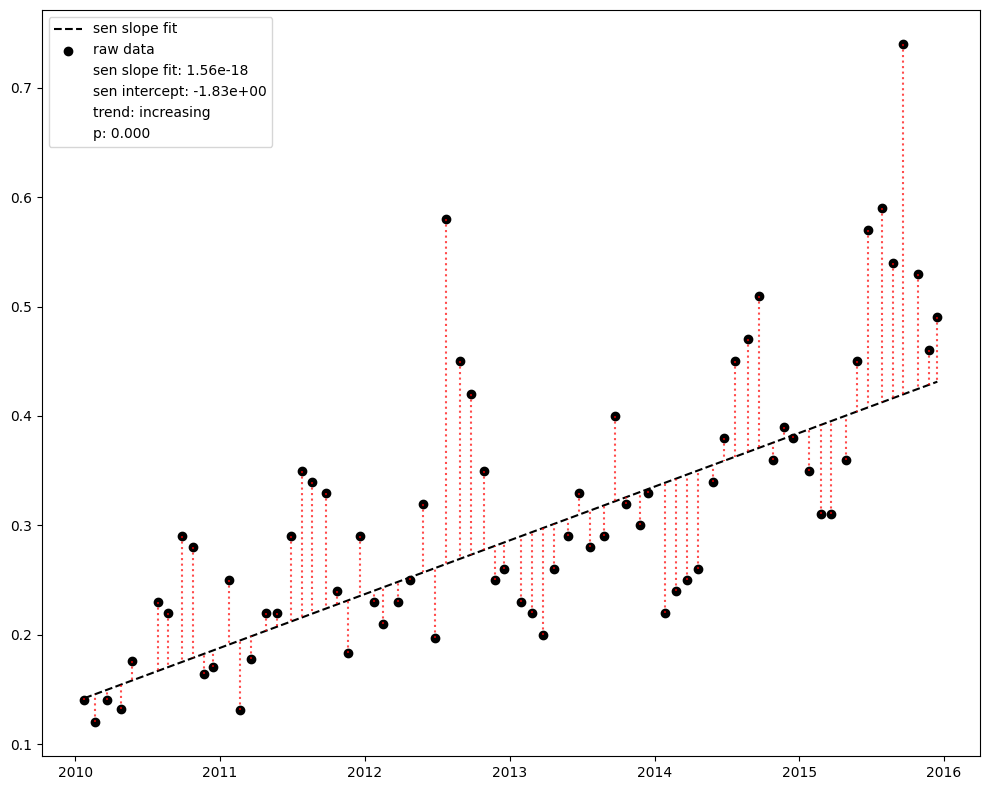

In [33]:
mk = MannKendall(ndata['n'], alpha=0.05)
senslope, senintercept, lo_slope, up_slope = mk.calc_senslope()
ndata['predicted'] = senslope * ndata.index.values.astype(float) + senintercept
ndata['residual'] = ndata['n'] - ndata['predicted']

mk_error = ndata['residual'].std()

print('The standard deviation of the residuals is: ', round(mk_error, 2))

fig, ax, (handles, labels) = mk.plot_data()
for i, row in ndata.iterrows():
    ax.plot([i, i], [row['n'], row['predicted']], color='red', ls=':', alpha=0.7)
fig.tight_layout()
plt.show()

This is getting better, but we can also do better. 

## Senslope/Sen-intercept Model with Seasonal Adjustment

There seems to be some seasonality in the data. We can account for this by adding a seasonal adjustment to our model. Here we'll use a simple sine wave to model the seasonal adjustment.  We'll then calculate the residuals from this model.  The standard deviation of the residuals becomes our estimate of the noise in the data. There are other, often better, ways to model seasonality, but this is a simple and effective way to demonstrate the concept.

The standard deviation of the residuals is:  0.06


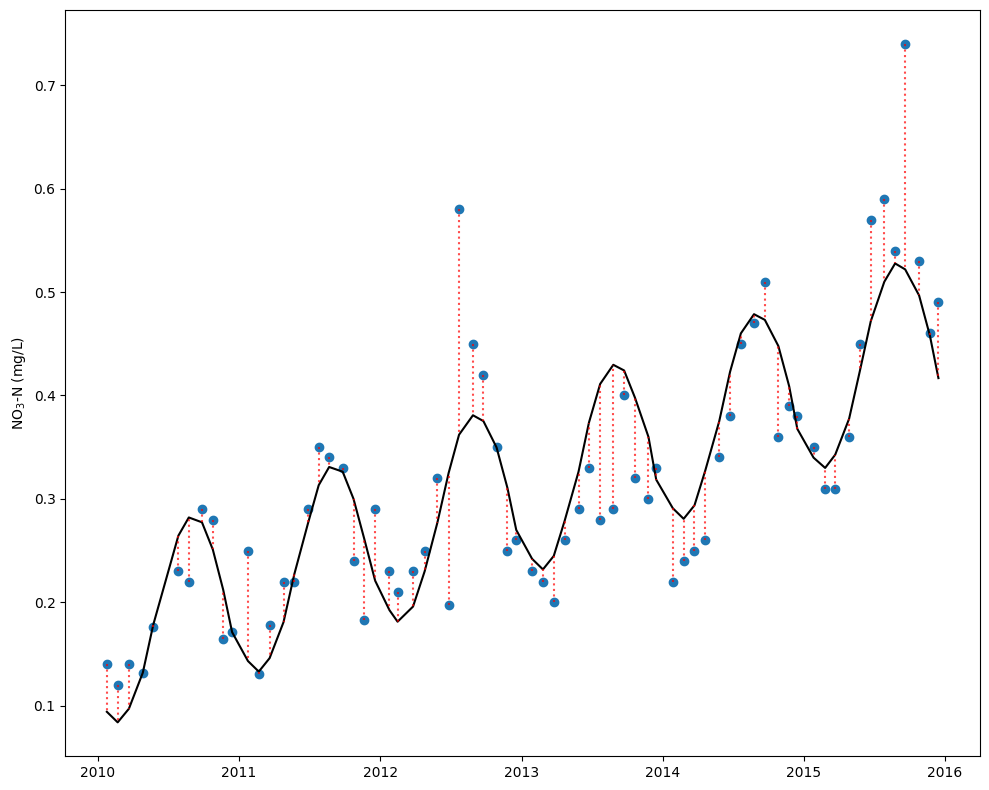

In [34]:
from scipy.optimize import curve_fit


def sine_model(x, a, c, d):
    b = 2 * np.pi / 12
    return a * np.sin(b * x + c) + d


popt, pcov = curve_fit(sine_model, ndata.index.month.astype(float), ndata['residual'], p0=[0.1, 0.1, 0.1])
ndata['seasonal'] = sine_model(ndata.index.month.astype(float), *popt)
ndata['predicted_seasonal'] = senslope * ndata.index.values.astype(float) + senintercept + ndata['seasonal']
ndata['residual_seasonal'] = ndata['n'] - ndata['predicted_seasonal']

sine_error = ndata['residual_seasonal'].std()
print('The standard deviation of the residuals is: ', round(sine_error, 2))

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(ndata.index, ndata['n'], label='raw data')
ax.plot(ndata.index, ndata['predicted_seasonal'], color='k', label='trend + seasonal')
ax.set_ylabel('NO$_{3}$-N (mg/L)')
for i, row in ndata.iterrows():
    ax.plot([i, i], [row['n'], row['predicted_seasonal']], color='red', ls=':', alpha=0.7)
fig.tight_layout()
plt.show()


## Bringing it all together

Lets plot all three models together to see how they compare

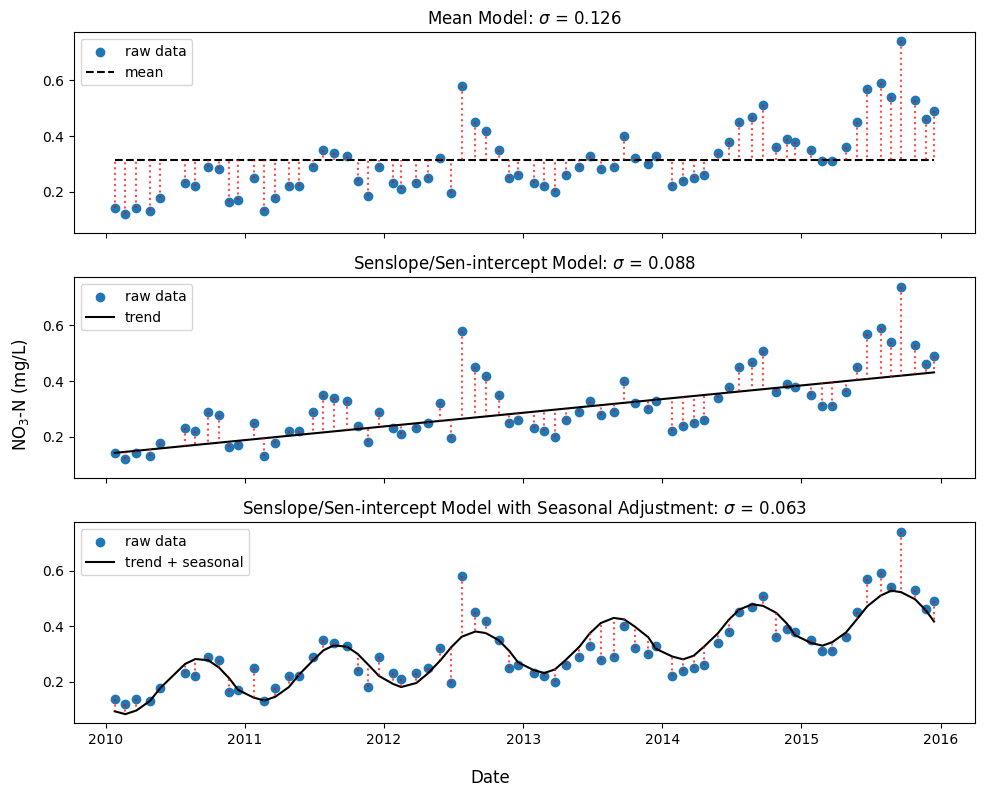

In [35]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True, sharey=True)
for ax in axs:
    ax.scatter(ndata.index, ndata['n'], label='raw data')

axs[0].plot(ndata.index, ndata['n'].mean() * np.ones(ndata.shape[0]), color='k', ls='--', label='mean')
for i, row in ndata.iterrows():
    axs[0].plot([i, i], [row['n'], nmean], color='red', ls=':', alpha=0.7)

axs[0].set_title('Mean Model: $\\sigma$ = {:.3f}'.format(mm_error))

axs[1].plot(ndata.index, ndata['predicted'], color='k', label='trend')
for i, row in ndata.iterrows():
    axs[1].plot([i, i], [row['n'], row['predicted']], color='red', ls=':', alpha=0.7)

axs[1].set_title('Senslope/Sen-intercept Model: $\\sigma$ = {:.3f}'.format(mk_error))

axs[2].plot(ndata.index, ndata['predicted_seasonal'], color='k', label='trend + seasonal')
for i, row in ndata.iterrows():
    axs[2].plot([i, i], [row['n'], row['predicted_seasonal']], color='red', ls=':', alpha=0.7)
axs[2].set_title('Senslope/Sen-intercept Model with Seasonal Adjustment: $\\sigma$ = {:.3f}'.format(sine_error))

for ax in axs:
    ax.legend()

fig.supylabel('NO$_{3}$-N (mg/L)')
fig.supxlabel('Date')
fig.tight_layout()
plt.show()

Obviously the Senslope/Sen-intercept with seasonality does the best job predicting the data.  This is reflected in the lower standard deviation of the residuals.  This is our best estimate of the noise in the data. Note that more complex predictions could exist and could bring in additional data (e.g. rainfall, temperature, etc.) to improve the model.  This is a simple example to demonstrate the concept and is only the beginning.